In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(149, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 149, dtype: object

In [13]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
#EDA on this dataset

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

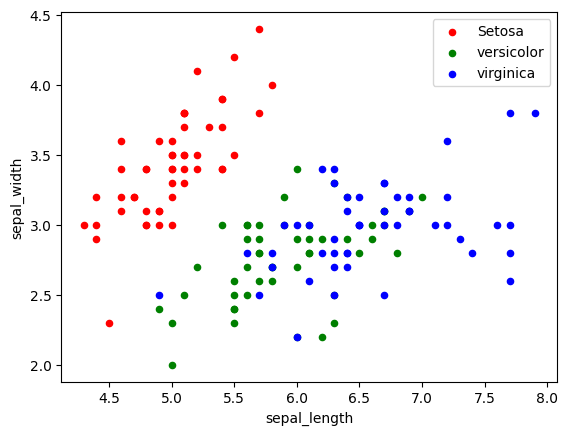

In [15]:
fig = df[df.species=='setosa'].plot(kind='scatter', color='red', x='sepal_length', y='sepal_width', label='Setosa')
df[df.species=='versicolor'].plot(kind='scatter', color='green', x='sepal_length', y='sepal_width', label='versicolor', ax=fig)
df[df.species=='virginica'].plot(kind='scatter', color='blue', x='sepal_length', y='sepal_width', label='virginica', ax=fig)

<Axes: xlabel='petal_length', ylabel='petal_width'>

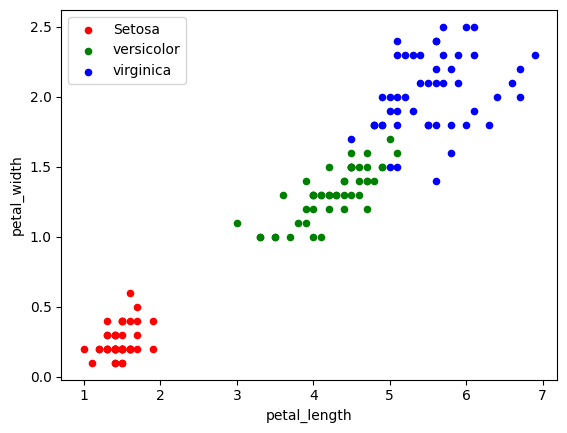

In [16]:
fig = df[df.species=='setosa'].plot(kind='scatter', color='red', x='petal_length', y='petal_width', label='Setosa')
df[df.species=='versicolor'].plot(kind='scatter', color='green', x='petal_length', y='petal_width', label='versicolor', ax=fig)
df[df.species=='virginica'].plot(kind='scatter', color='blue', x='petal_length', y='petal_width', label='virginica', ax=fig)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

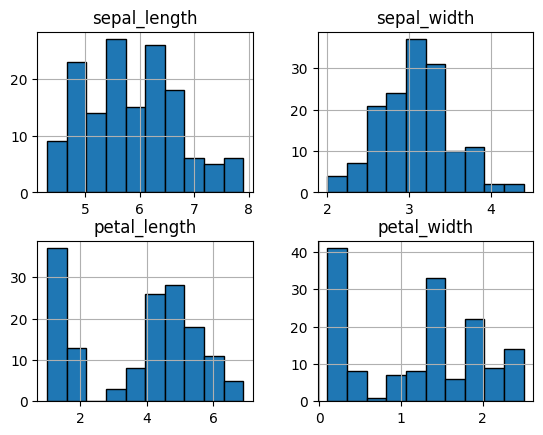

In [17]:
df.hist(edgecolor = 'black')

<Axes: xlabel='species', ylabel='petal_width'>

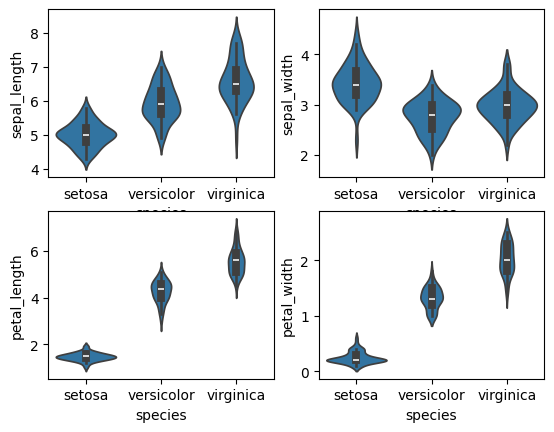

In [18]:
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=df)

In [42]:
#Encoding

In [43]:
plants = df.species.unique()

In [44]:
plants

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
def encode(val):
    for i in range(0,len(plants)):
        if val == plants[i]:
            return i

In [48]:
df.species = df.species.map(encode)

In [49]:
df.species.unique()

array([0, 1, 2])

In [50]:
#Splitting th values in x and y

In [51]:
X = df.drop(columns=['species'])

In [52]:
y = df.species

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 4), (30, 4), (119,), (30,))

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 1])

In [62]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  96.66666666666667


In [63]:
cm = confusion_matrix(y_test,y_pred)

In [64]:
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

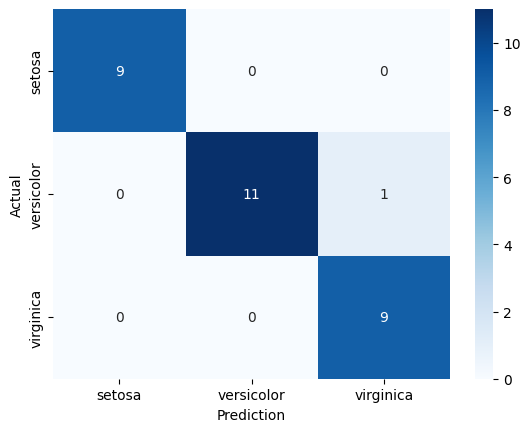

In [66]:
sns.heatmap(cm, cmap='Blues',annot=True, xticklabels=plants, yticklabels=plants)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [69]:
cr = classification_report(y_test,y_pred)

In [70]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

